In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
map_path = '../src/asc/MNT_MED100m_GDL-CA_HOMONIM_WGS84_NM_ZNEG.asc'

In [27]:
# Load header
header_len = 6
header = dict()
with open(map_path, 'r') as map:
    for line in map.readlines()[:header_len]:
        key, val = line.strip().split()
        if key in ('NCOLS', 'NROWS'): val = int(val)
        else: val = float(val)
        header[key] = val

# Load map
map = np.loadtxt(map_path, skiprows=header_len)
map[map==header['NODATA_VALUE']] = np.nan

In [33]:
header

{'NCOLS': 5001,
 'NROWS': 2701,
 'XLLCORNER': 2.8995,
 'YLLCORNER': 41.6995,
 'CELLSIZE': 0.001,
 'NODATA_VALUE': -99999.0}

In [35]:
dx = 2 * np.pi * 6378000 / 360 * header['CELLSIZE']
print(f"self.CELLSIZE = {header['CELLSIZE']}° \nself.dx = {dx} m (approximation)")

self.CELLSIZE = 0.001° 
self.dx = 111.31709969219835 m (approximation)


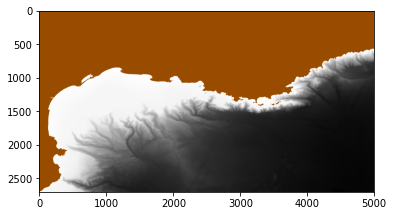

In [40]:
# Plot map
PLOT = np.empty((map.shape[0], map.shape[1], 3))

array = np.copy(map)
array[np.isnan(array)] = 0
array = np.abs(array) / np.amax(np.abs(array))

PLOT[:, :, 0] = np.ones(array.shape) - array
PLOT[:, :, 1] = np.ones(array.shape) - array
PLOT[:, :, 2] = np.ones(array.shape) - array

PLOT[np.isnan(map)] = [0.6, 0.3, 0]
plt.imshow(PLOT)